In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/vivek2011383/EDA-Exercise/refs/heads/main/Car%20Sale.csv")

In [4]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [5]:
df.shape

(23906, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

In [11]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_selling_dealer = df.groupby("Dealer_Name")["Price ($)"].mean()

avg_selling_dealer = avg_selling_dealer.sort_values(ascending=False)
pd.DataFrame(avg_selling_dealer)

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Capitol KIA,28189.703822
Saab-Belle Dodge,28176.692000


In [12]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_std = df.groupby("Company")["Price ($)"].std().sort_values(ascending=True)

print("Standard Deviation of Car Prices by Brand:")
print(price_std)

most_variable_brand = price_std.idxmax()
highest_std = price_std.max()

print(f"\nBrand with highest price variation: {most_variable_brand}")
print(f"Standard Deviation: ${highest_std:.2f}")

Standard Deviation of Car Prices by Brand:
Company
Hyundai        3485.982649
Porsche        5261.839206
Acura          8183.046414
Jeep           9459.834418
Jaguar        10222.531533
Honda         11148.629062
Dodge         11181.678786
Chrysler      11583.286811
Mitsubishi    11671.343035
Volkswagen    12527.124011
Audi          12904.243867
Subaru        12920.771620
Volvo         12933.790185
Chevrolet     13311.063223
Infiniti      13696.332844
Pontiac       14348.963592
BMW           15065.578723
Toyota        15367.131714
Oldsmobile    15711.345857
Mercedes-B    15722.807459
Ford          15849.090227
Saturn        15990.223671
Nissan        16214.264017
Mercury       16445.172195
Buick         17142.232626
Lexus         17852.923492
Plymouth      19065.997338
Cadillac      19517.120220
Saab          19653.740089
Lincoln       19658.050211
Name: Price ($), dtype: float64

Brand with highest price variation: Lincoln
Standard Deviation: $19658.05


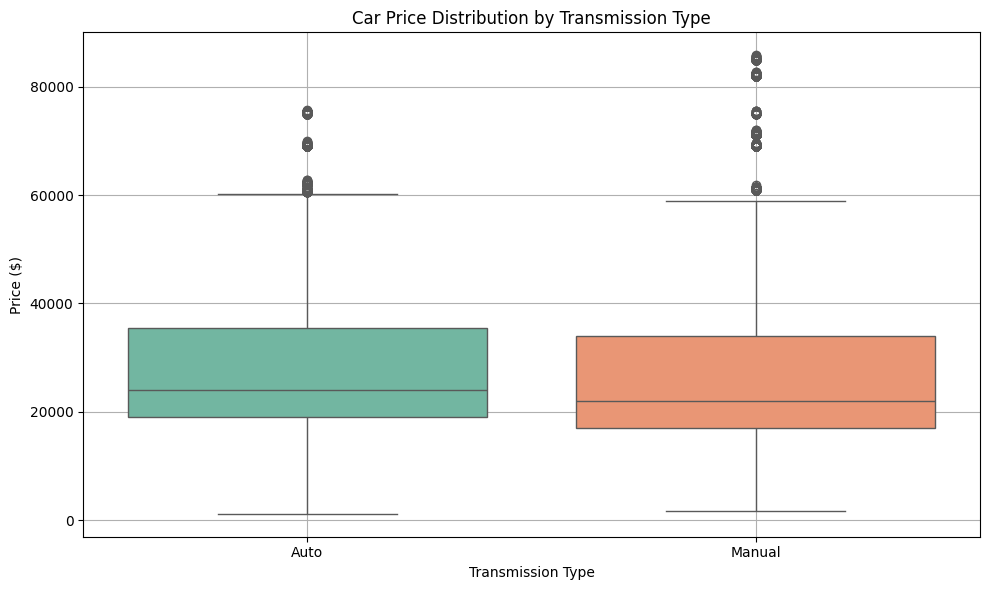


Interquartile Ranges (IQR) by Transmission Type:
Auto: $16500.00
Manual: $17000.00


In [13]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x= "Transmission", y="Price ($)", palette="Set2")
plt.title("Car Price Distribution by Transmission Type")
plt.ylabel("Price ($)")
plt.xlabel("Transmission Type")
plt.grid(True)
plt.tight_layout()
plt.show()

iqr_results = {}
for transmission, group in df.groupby('Transmission'):
    Q1 = group['Price ($)'].quantile(0.25)
    Q3 = group['Price ($)'].quantile(0.75)
    IQR = Q3 - Q1
    iqr_results[transmission] = IQR


print("\nInterquartile Ranges (IQR) by Transmission Type:")
for trans, iqr in iqr_results.items():
    print(f"{trans}: ${iqr:.2f}")

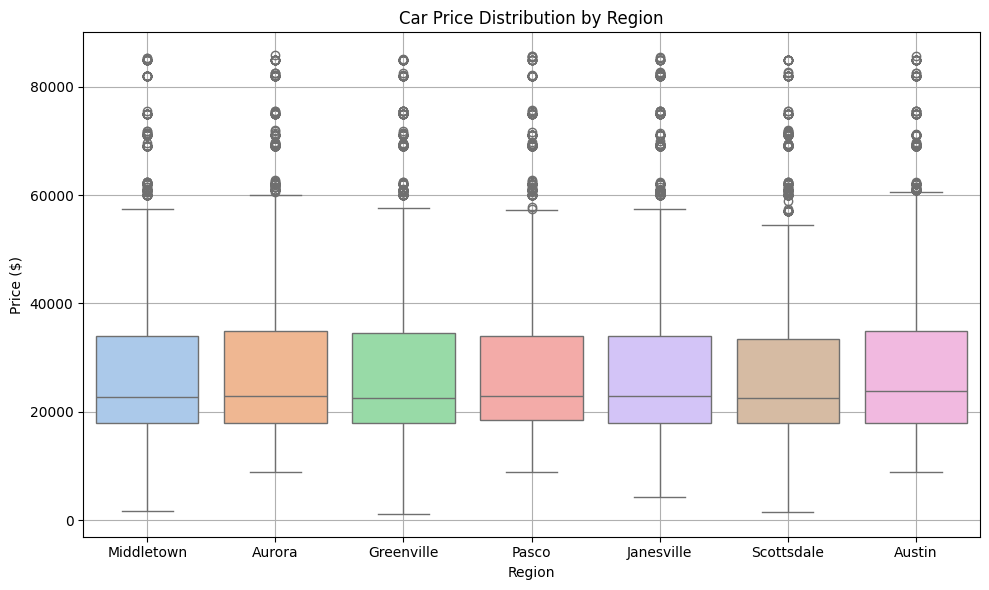

In [14]:
#4. What is the distribution of car prices across different regions.


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='pastel')
plt.title('Car Price Distribution by Region')
plt.ylabel('Price ($)')
plt.xlabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()

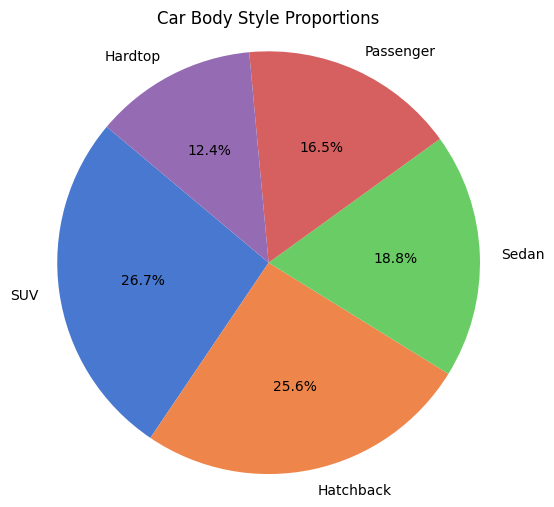

In [15]:
#5.  What is the distribution of cars based on body styles?

body_style_counts = df['Body Style'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(body_style_counts, labels=body_style_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Car Body Style Proportions')
plt.axis('equal')
plt.show()

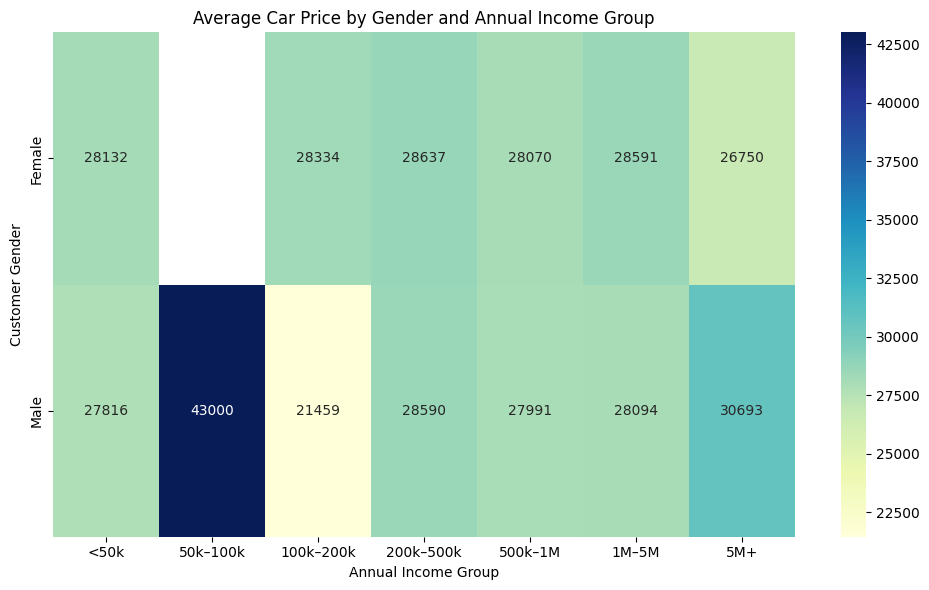

In [16]:
#6. How does the average selling price of cars vary by customer gender and annual income?

income_bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, float('inf')]
income_labels = ['<50k', '50k–100k', '100k–200k', '200k–500k', '500k–1M', '1M–5M', '5M+']

df['IncomeGroup'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

avg_price = df.groupby(['Gender', 'IncomeGroup'])['Price ($)'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(avg_price, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Car Price by Gender and Annual Income Group")
plt.xlabel("Annual Income Group")
plt.ylabel("Customer Gender")
plt.tight_layout()
plt.show()

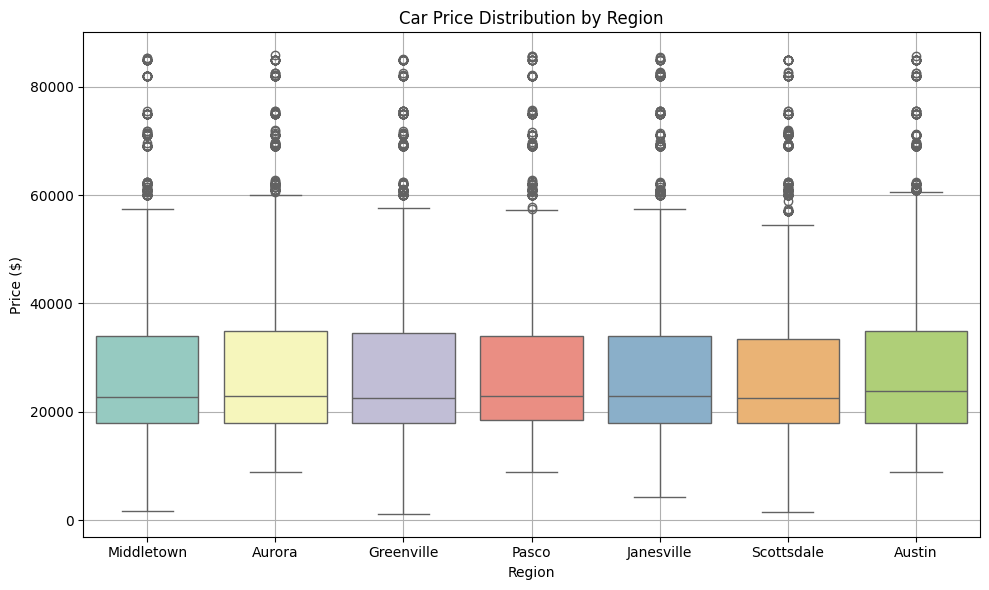

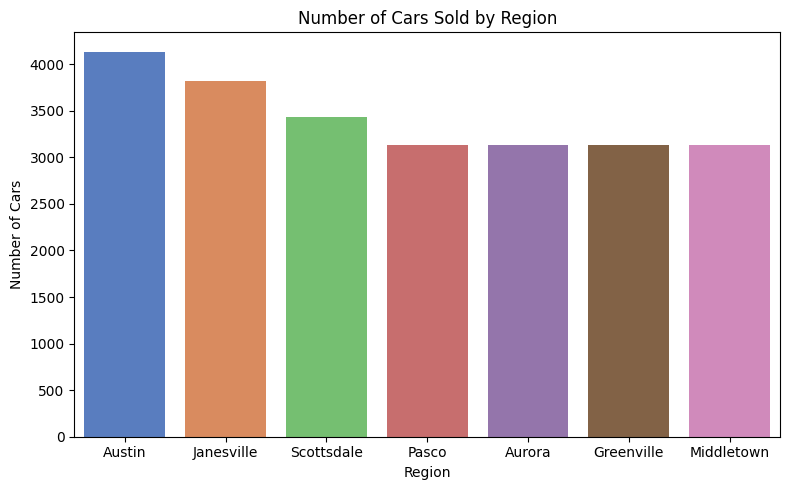

In [17]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

#Plot 1: Price Distribution by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Dealer_Region', y='Price ($)', palette='Set3')
plt.title('Car Price Distribution by Region')
plt.ylabel('Price ($)')
plt.xlabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot 2: Number of Cars Sold per Region
car_counts = df['Dealer_Region'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=car_counts.index, y=car_counts.values, palette='muted')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars')
plt.tight_layout()
plt.show()

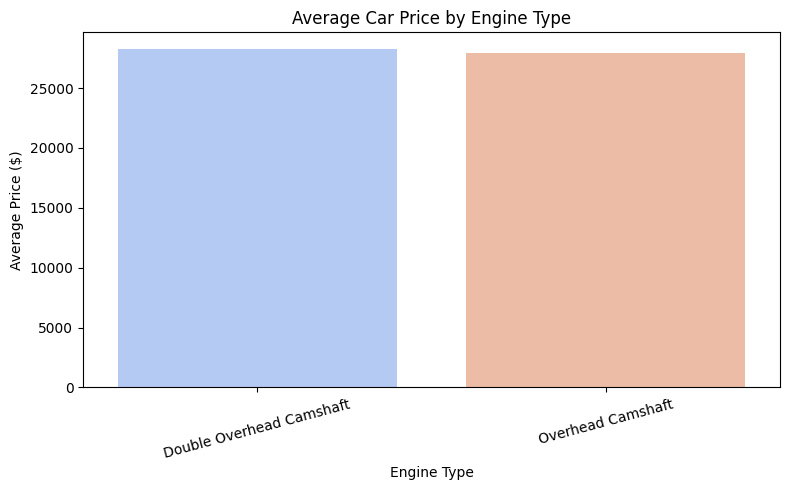


Average Price by Engine Type:
Engine
Double Overhead Camshaft    28247.193317
Overhead Camshaft           27914.710631
Name: Price ($), dtype: float64


In [18]:
#8. How does the average car price differ between cars with different engine sizes?

df['Engine'] = df['Engine'].str.replace('\xa0', ' ', regex=True).str.replace('Â', '', regex=True).str.strip()

avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette='coolwarm')
plt.title('Average Car Price by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print("\nAverage Price by Engine Type:")
print(avg_price_by_engine)

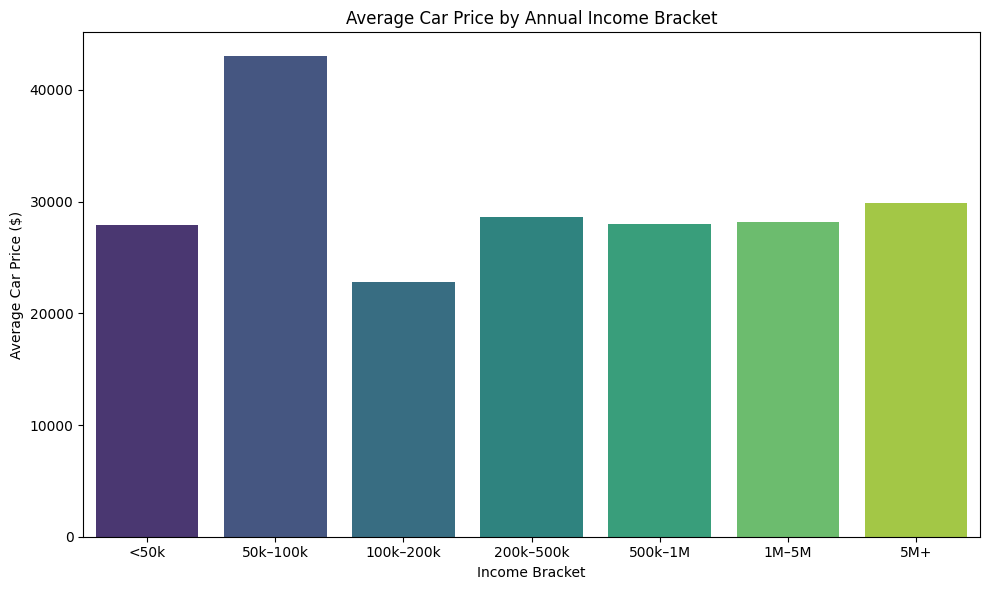

In [19]:
#9.  How do car prices vary based on the customer’s annual income bracket?

income_bins = [0, 50000, 100000, 200000, 500000, 1000000, 5000000, float('inf')]
income_labels = ['<50k', '50k–100k', '100k–200k', '200k–500k', '500k–1M', '1M–5M', '5M+']

df['IncomeGroup'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

avg_price_by_income = df.groupby('IncomeGroup')['Price ($)'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette='viridis')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.tight_layout()
plt.show()

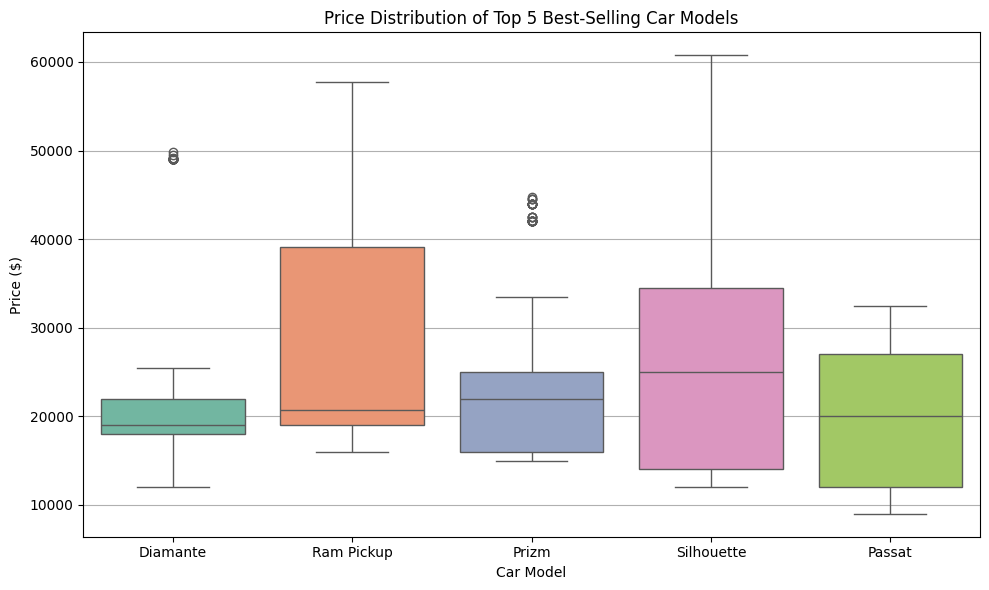

In [20]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_models = df['Model'].value_counts().nlargest(5).index.tolist()

top_df = df[df['Model'].isin(top_models)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_df, x='Model', y='Price ($)', palette='Set2')
plt.title('Price Distribution of Top 5 Best-Selling Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


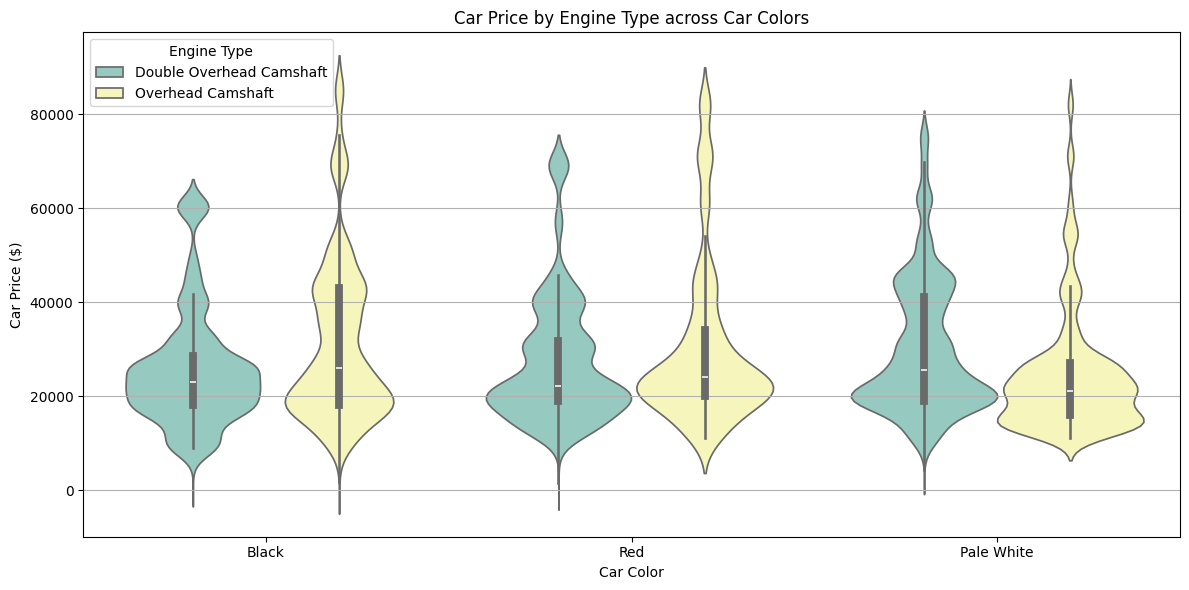


Price Variation by Car Color:

                    mean           std  Price Range
Color                                              
Black       28564.798015  15286.065976        84600
Red         28736.319007  15519.360962        81150
Pale White  27482.334074  14077.003889        78600


In [27]:
#11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation?

#Plot price distribution by EngineType and Color
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Color', y='Price ($)', hue='Engine', palette='Set3')
plt.title('Car Price by Engine Type across Car Colors')
plt.xlabel('Car Color')
plt.ylabel('Car Price ($)')
plt.grid(True, axis='y')
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

#Find color with highest price variation
price_variation = df.groupby('Color')['Price ($)'].agg(['mean', 'std', 'min', 'max', 'count'])
price_variation['Price Range'] = price_variation['max'] - price_variation['min']
price_variation_sorted = price_variation.sort_values(by='Price Range', ascending=False)

print("\nPrice Variation by Car Color:\n")
print(price_variation_sorted[['mean', 'std', 'Price Range']])

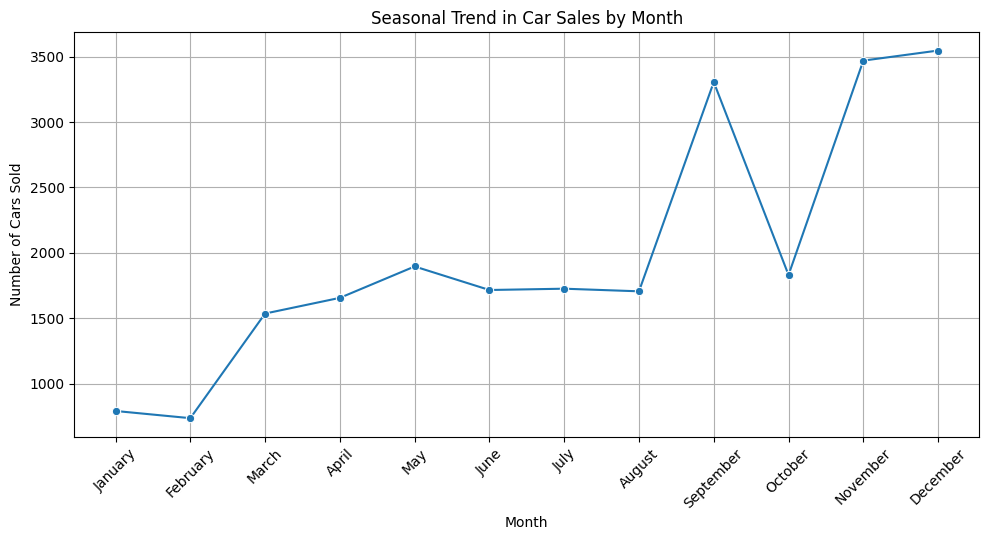


 Monthly Sales Count:

        Month  Sales
0     January    790
1    February    735
2       March   1535
3       April   1655
4         May   1895
5        June   1715
6        July   1725
7      August   1705
8   September   3305
9     October   1830
10   November   3469
11   December   3546


In [32]:
#12. Is there any seasonal trend in car sales based on the date of sale?

df['Month'] = df['Date'].dt.month_name()
df['MonthNum'] = df['Date'].dt.month

monthly_sales = df.groupby(['MonthNum', 'Month']).size().reset_index(name='Sales')
monthly_sales = monthly_sales.sort_values('MonthNum')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', sort=False)
plt.title('Seasonal Trend in Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

print("\n Monthly Sales Count:\n")
print(monthly_sales[['Month', 'Sales']])

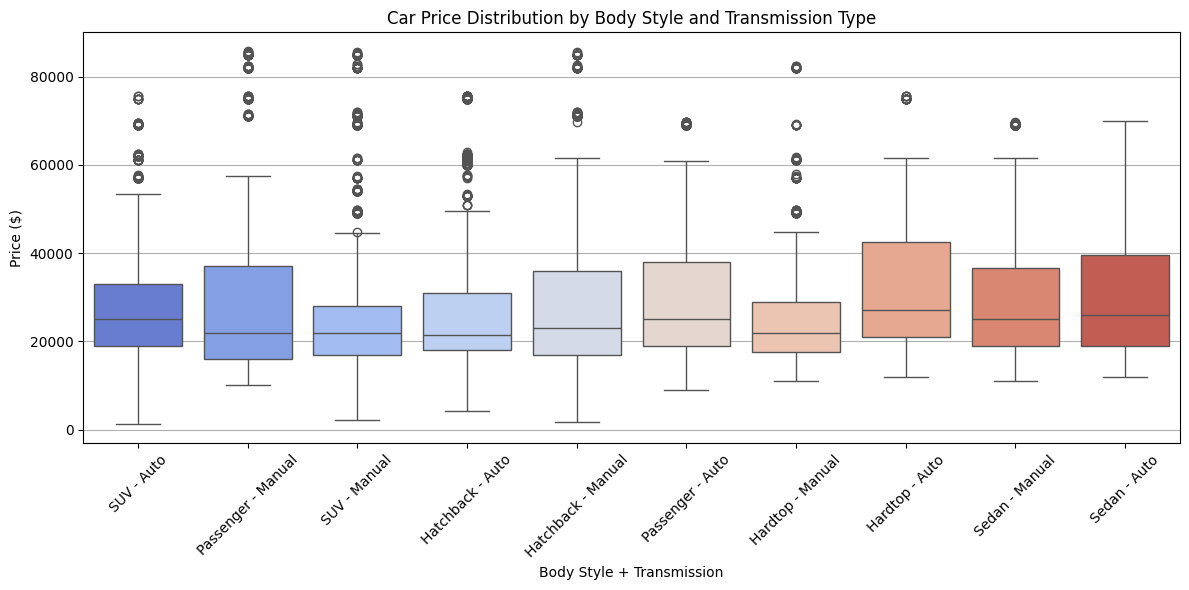

In [35]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type?

df['Body_Trans'] = df['Body Style'] + ' - ' + df['Transmission']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body_Trans', y='Price ($)', palette='coolwarm')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style + Transmission')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Correlation Matrix:

                   Price ($)  Annual Income  EngineTypeEncoded
Price ($)           1.000000       0.012075           0.011226
Annual Income       0.012075       1.000000           0.006606
EngineTypeEncoded   0.011226       0.006606           1.000000


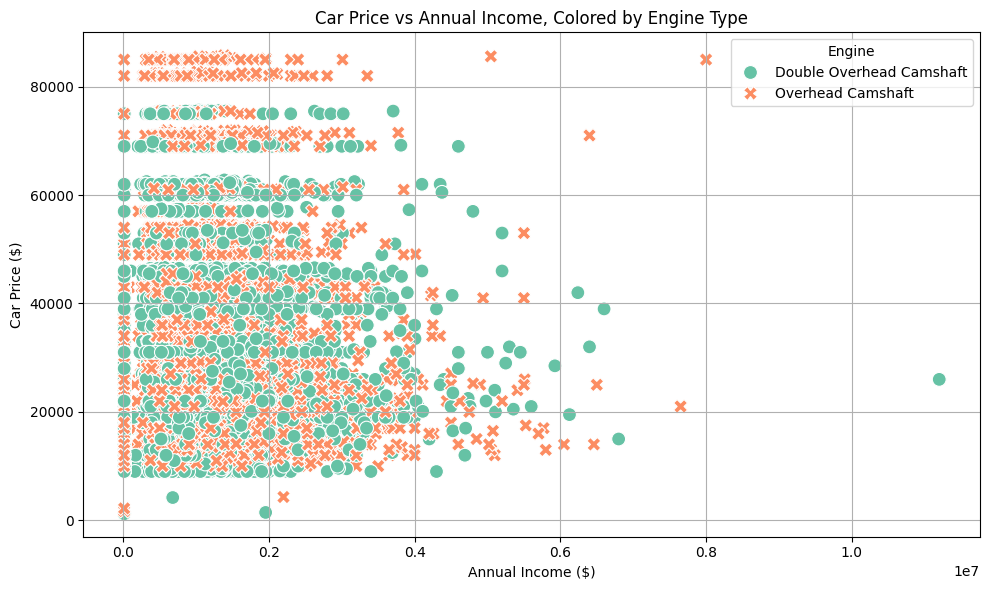

In [36]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

df['EngineTypeEncoded'] = df['Engine'].map({'Overhead Camshaft': 0, 'Double Overhead Camshaft': 1})

correlation = df[['Price ($)', 'Annual Income', 'EngineTypeEncoded']].corr()
print("Correlation Matrix:\n")
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Engine', style='Engine', palette='Set2', s=100)
plt.title('Car Price vs Annual Income, Colored by Engine Type')
plt.xlabel('Annual Income ($)')
plt.ylabel('Car Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
#15. How does the average car price vary across different car models and engine types?

avg_prices = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

heatmap_data = avg_prices.pivot(index='Model', columns='Engine', values='Price ($)')

heatmap_data['Average'] = heatmap_data.mean(axis=1)
heatmap_data = heatmap_data.sort_values(by='Average', ascending=False).drop(columns='Average')

fig = px.imshow(
    heatmap_data,
    labels=dict(x="Engine Type", y="Car Model", color="Avg Price ($)"),
    color_continuous_scale='Viridis',
    aspect='auto',
    height=1200
)

fig.update_layout(
    title='Interactive Heatmap: Avg Car Price by Model and Engine Type',
    xaxis_side="top",
    margin=dict(l=0, r=0, t=60, b=0)
)

fig.show()

In [28]:
df.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,IncomeGroup
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,<50k
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,1M–5M
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,1M–5M
